## Movie Recommender System (Content-Based)

This project builds a **content-based movie recommender system** using the IMDb Top 1000 dataset.  
The system recommends similar movies based on their **genres** using **TF-IDF Vectorization** and **Cosine Similarity**.

---

## 📂 Project Workflow

1. **Data Loading & Cleaning**  
   Load the dataset, handle missing values, and preprocess genres.  

2. **Exploratory Data Analysis (EDA)**  
   Understand genre distribution with plots and word clouds.  

3. **Feature Engineering**  
   Convert movie genres into TF-IDF features and using CountVectorizer.  

4. **Model Building**  
   Use cosine similarity to recommend top similar movies.  

5. **Recommendations**  
   Create a function to recommend movies by title.  

---

## 🛠️ Technologies Used
- Python 🐍
- Pandas & NumPy
- Scikit-learn (TF-IDF, cosine similarity)
- Matplotlib & Seaborn
- WordCloud


In [1]:
#Import libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


#Load dataset 
movies = pd.read_csv("imdb_top_1000.csv")
movies.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


In [2]:
movies.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [ ]:
# Combine all genres into one string
text = " ".join(movies['Genre'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(" Genre Distribution WordCloud", fontsize=16)
plt.show()


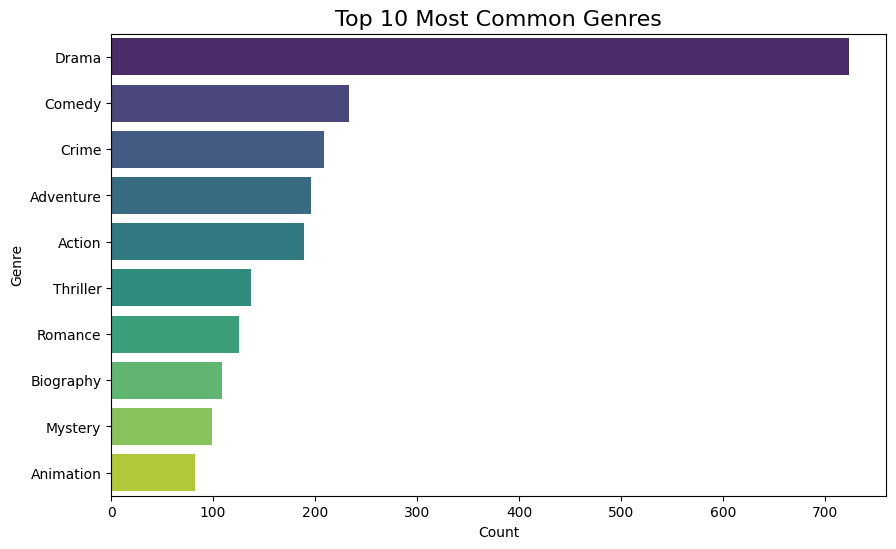

In [4]:

# Split genres and count
from collections import Counter
genre_list = movies['Genre'].str.split(",").sum()
genre_counts = Counter([g.strip() for g in genre_list])

# Convert to DataFrame

genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df.head(10), x="Count", y="Genre", hue="Genre", palette="viridis", legend=False)
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.show()


## Create a TF-IDF matrix from genres


In [5]:
tfidf = TfidfVectorizer(stop_words='english')

Represent Movies as Numbers

Computers can’t understand "Action|Adventure" directly.
So we convert text into vectors using:

**Bag of Words (count words)

**TF-IDF (weights words by importance)**

In [6]:
tfidf_matrix = tfidf.fit_transform(movies['Genre'])

In [7]:
movies.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

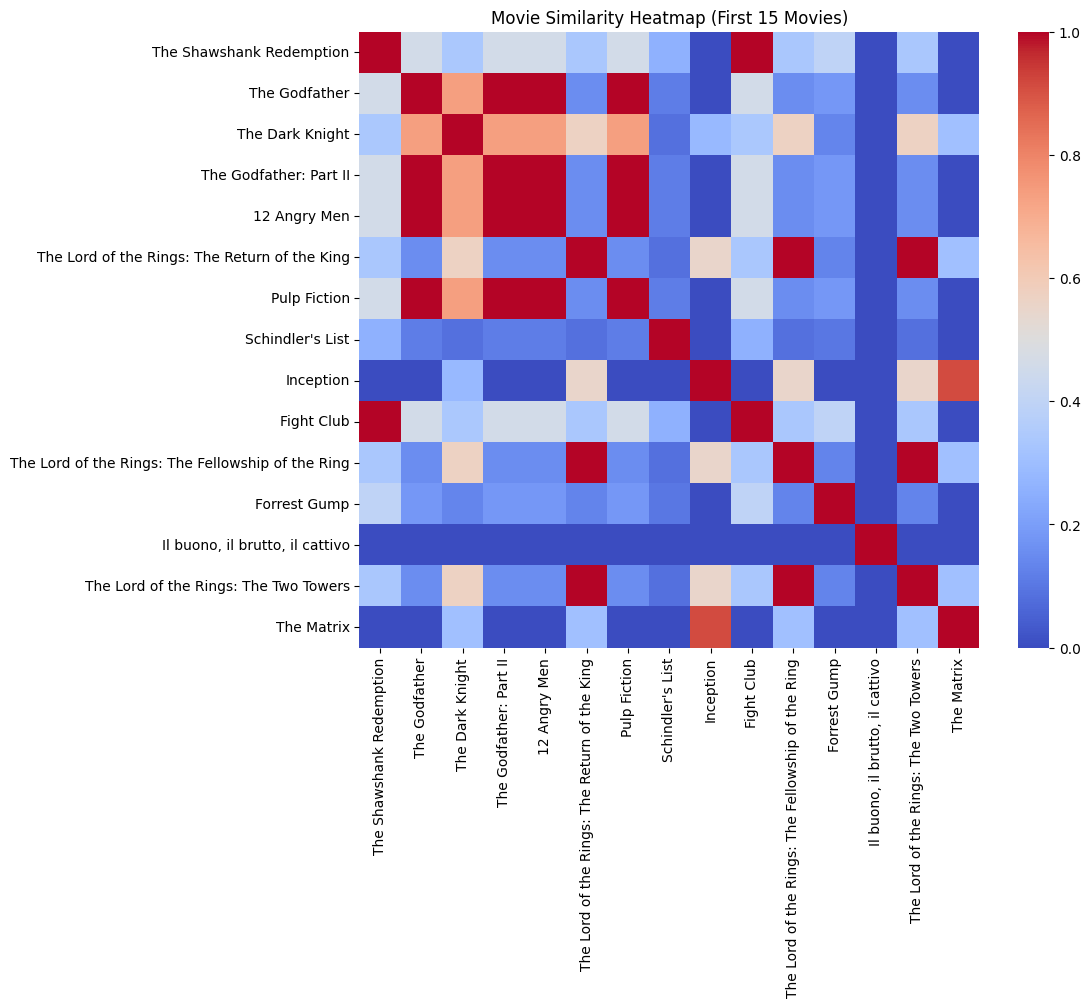

In [29]:
# Generate similarity matrix using TF-IDF
cosine_sim_tfidf = cosine_similarity(tfidf_matrix)

# Take first 15 movies for smaller heatmap
sample_similarity = cosine_sim_tfidf[:15, :15]

plt.figure(figsize=(10,8))
sns.heatmap(
    sample_similarity, 
    cmap="coolwarm", 
    xticklabels=movies['Series_Title'][:15], 
    yticklabels=movies['Series_Title'][:15]
)
plt.title("Movie Similarity Heatmap (First 15 Movies)")
plt.show()


tfidf.fit_transform(...) →

fit = learn the "dictionary" of words (Action, Comedy, Drama, etc.)

transform = turn each row into a vector of numbers (importance scores for each word).

## Compute cosine similarity between movies


In [30]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

We then measure similarity between movies using cosine similarity.
Cosine similarity = angle between two vectors.

1 → very similar

0 → totally different

In [31]:
movies.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## Build a reverse map (movie title -> index)


In [32]:
indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()

In [33]:
#Function to recommend movies
def genre_recommender(title, cosine_sim=cosine_sim_tfidf):
    if title not in indices:
        return ["Movie not found in database."]
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]
    
    return movies['Series_Title'].iloc[movie_indices].tolist()


Take a movie, find its similarity score with all others, and return top 5.

## Testing the Genre recommender


In [34]:
print("Genre only Recommended movies for 'Inception':")
print(genre_recommender("Inception"))

Genre only Recommended movies for 'Inception':
['Avengers: Infinity War', 'Aliens', 'Mad Max: Fury Road', 'Jurassic Park', 'The Avengers']


## Genre-Only vs. Combined Features in Recommendations

To build our recommender system, we tried two approaches for representing movies:

---

### 1. **Using Genre Only**
- Here we only used the `Genre` column.  
- Example: *Inception* → `"Action, Adventure, Sci-Fi"`.  
- The similarity is computed purely on overlapping genres.  
- **Pros:**  
  - Very fast and easy to implement.  
  - Good at grouping movies by broad categories.  
- **Cons:**  
  - Too generic → many movies share the same genres, so recommendations may feel repetitive.  

---

### 2. **Using Combined Features**
We created a new feature `combined_features` by merging:  

- **Genre**  
- **Overview**  (movie description)  
- **Director**   
- **Main Stars**   

Example for *Inception*:  

- **Pros:**  
  - Richer representation → captures storyline, people involved, and style.  
  - More specific → can recommend based on similar plots or directors (not just genre).  
- **Cons:**  
  - Requires more computation.  
  - Can include some noisy text.  

---

### ⚖️ Why Compare Both?
- **Genre-only** is like a *broad brush* — quick, but not very precise.  
- **Combined features** is like *fine detail work* — more effort, but gives smarter recommendations.  


## Combined Recommender()

In [35]:
movies['combined_features'] = (
    movies['Genre'].fillna('') + " " +
    movies['Director'].fillna('') + " " +
    movies['Star1'].fillna('') + " " +
    movies['Star2'].fillna('') + " " +
    movies['Overview'].fillna('')
)


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(movies['combined_features'])
cosine_sim_count = cosine_similarity(count_matrix)


In [37]:
indices = pd.Series(movies.index, index=movies['Series_Title']).drop_duplicates()

def recommend(title, cosine_sim=cosine_sim_count):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return movies[['Series_Title',    'IMDB_Rating',   'Genre']].iloc[movie_indices]


## 🔍 Comparing TF-IDF vs CountVectorizer in Movie Recommendation

In our recommender system, we experimented with **two text vectorization techniques**:

1. **CountVectorizer**  
   - Simply counts how many times each word appears.  
   - Example: If the word "Action" appears 3 times, the feature value = 3.  
   - Treats all words equally, even if they are very common.

2. **TF-IDF (Term Frequency – Inverse Document Frequency)**  
   - Not only counts words but also **reduces the weight of very common words** (like "Drama", "Love") and **gives higher weight to rare but meaningful words** (like "Time-travel", "Dream").  
   - This helps capture more *unique* movie features.

---

### Why Compare?
Both methods generate a similarity matrix (how close two movies are based on their text features).  
- **CountVectorizer** often finds movies that share a lot of frequent genres/words.  
- **TF-IDF** tries to highlight more *distinctive similarities*.  

---

### 📝 Example: Recommendations for *Inception*
Below we compare the top-5 recommended movies using **TF-IDF** vs **CountVectorizer**.

- **TF-IDF**: tends to recommend movies with deeper connections (sci-fi, complex themes).  
- **CountVectorizer**: tends to recommend movies that overlap with common tags like "Action", "Adventure".

```python
print("Recommended movies using TF-IDF:")
print(recommend("Inception", cosine_sim_tfidf))

print("Recommended movies using CountVectorizer:")
print(recommend("Inception", cosine_sim_count))


In [38]:
title = "Inception"

print(f"\n🎬 Recommended movies for '{title}' using **TF-IDF**:\n")
print(recommend(title, cosine_sim_tfidf))

print(f"\n\n🎬 Recommended movies for '{title}' using **CountVectorizer**:\n")
print(recommend(title, cosine_sim_count))


🎬 Recommended movies for 'Inception' using **TF-IDF**:

               Series_Title  IMDB_Rating                      Genre
60   Avengers: Infinity War          8.4  Action, Adventure, Sci-Fi
106                  Aliens          8.3  Action, Adventure, Sci-Fi
223      Mad Max: Fury Road          8.1  Action, Adventure, Sci-Fi
262           Jurassic Park          8.1  Action, Adventure, Sci-Fi
357            The Avengers          8.0  Action, Adventure, Sci-Fi


🎬 Recommended movies for 'Inception' using **CountVectorizer**:

      Series_Title  IMDB_Rating                      Genre
21    Interstellar          8.6   Adventure, Drama, Sci-Fi
155  Batman Begins          8.2          Action, Adventure
677       Predator          7.8  Action, Adventure, Sci-Fi
634       Serenity          7.8  Action, Adventure, Sci-Fi
36    The Prestige          8.5     Drama, Mystery, Sci-Fi


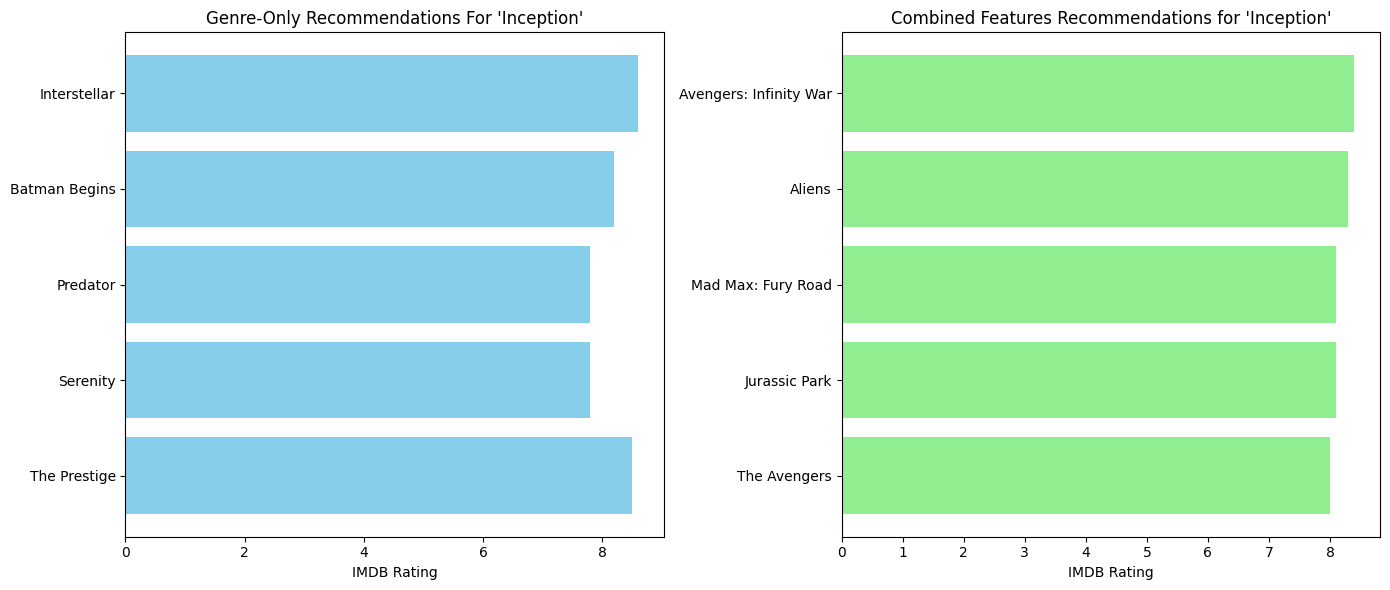

In [39]:
# Get recommendations using both methods
genre_recs = recommend("Inception", cosine_sim=cosine_sim_count)  # Genre-only (CountVectorizer)
combined_recs = recommend("Inception", cosine_sim=cosine_sim_tfidf)  # Combined features (TF-IDF)

# Plot side-by-side bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Genre-only plot
axes[0].barh(genre_recs['Series_Title'], genre_recs['IMDB_Rating'], color='skyblue')
axes[0].set_title("Genre-Only Recommendations For 'Inception'")
axes[0].set_xlabel("IMDB Rating")
axes[0].invert_yaxis()  # Show top movie at top

# Combined features plot
axes[1].barh(combined_recs['Series_Title'], combined_recs['IMDB_Rating'], color='lightgreen')
axes[1].set_title("Combined Features Recommendations for 'Inception'")
axes[1].set_xlabel("IMDB Rating")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()
